<a href="https://colab.research.google.com/github/LuisMejia2500/Ejercicios_Python/blob/Machine_Learning/redneuronaljemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerias

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Revisamos la version de tensorfloe que tenemos instalada.


In [3]:
print(tf.__version__)

2.3.0


Importamos el set de imagenes en este caso son 60.000 imagenes ya tratadas y cargadas.


In [6]:
fashion_mnist = keras.datasets.fashion_mnist

El arreglo train_images y train_labels son los arreglos que training set—el modelo de datos usa para aprender.
el modelo es probado contra los arreglos test set, el test_images, y test_labels.
Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los labels son un arreglo de integros, que van del 0 al 9. Estos corresponden a la class de ropa que la imagen representa.

In [9]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



Cada imagen es mapeada a una unica etiqueta. Ya que los Class names no estan incluidoen el dataset, almacenelo aca para usarlos luego cuando se visualicen las imagenes:

In [20]:
class_names = ['Camisilla/ombliguera', 'Pantalon', 'Sueter', 'Vestido', 'Buso',
               'Sandalias', 'camisa','Tennis', 'Morral', 'Botines']

Convertimos la imagen y pintamos por pantalla por mapa de color la figura dada en la posicion 0 del array de imagenes.

In [ ]:
train_images.shape
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
train_images = train_images / 255.0
test_images = test_images / 255.0

Mostramos por pantalla una matriz con los primeros 25 elementos de la lista de imagenes.

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Eliminamos el peso negativo de las imagenes y le damos valores maximo de 1.

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Entrenamos a la red neuronal con el set de modelos predeterminados.

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5597 - accuracy: 0.4760
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5302 - accuracy: 0.4818
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5019 - accuracy: 0.4843
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4751 - accuracy: 0.4875
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4496 - accuracy: 0.4908
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4257 - accuracy: 0.4949
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4033 - accuracy: 0.4982
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3821 - accuracy: 0.5014
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3626 - accuracy: 0.5043
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.344

In [ ]:
Evaluar exactitud.

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.3365 - accuracy: 0.5248

Test accuracy: 0.5248000025749207


Realizamos la primera prediccion. 

In [28]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

9

Graficamos la prediccion para 10 elementos.

In [38]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

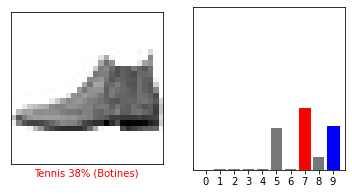

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

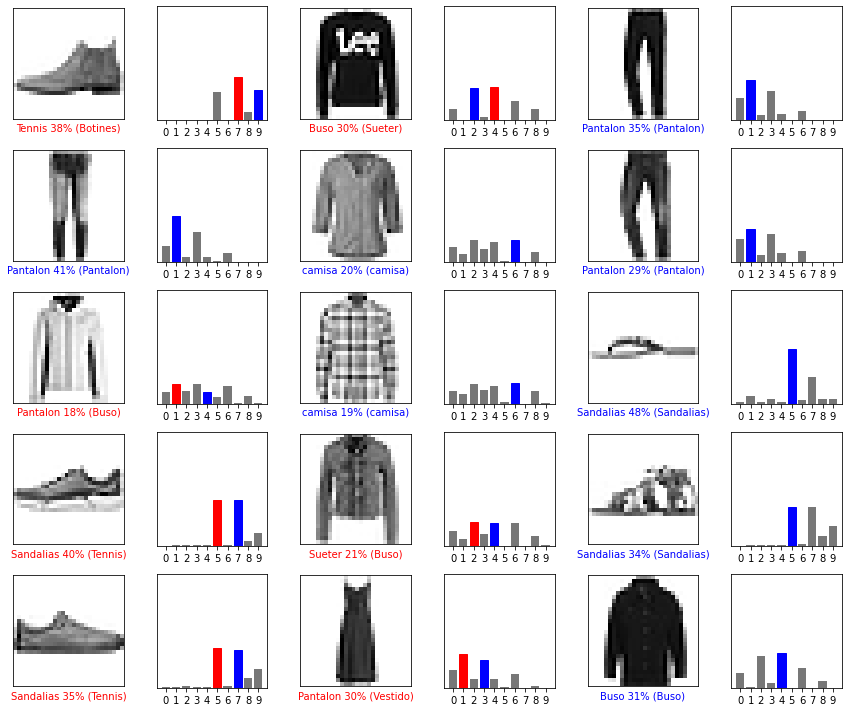

In [40]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()